In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
df=pd.read_csv("relationships_advise_16_final.csv",sep=";")

# General

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             42327 non-null  object 
 1   Toxicity           41734 non-null  float64
 2   Severe Toxicity    41734 non-null  float64
 3   Profanity          41734 non-null  float64
 4   Identity Attack    41734 non-null  float64
 5   Insult             41734 non-null  float64
 6   Threat             41734 non-null  float64
 7   controversiality   42327 non-null  bool   
 8   body               42327 non-null  object 
 9   link_id            42327 non-null  object 
 10  score              42327 non-null  int64  
 11  author_flair_text  42327 non-null  object 
 12  created_utc        42327 non-null  object 
 13  parent_id          42327 non-null  object 
 14  gilded             42327 non-null  int64  
 15  edited             42327 non-null  bool   
 16  id                 423

In [4]:
df.describe()

Toxicity  Severe Toxicity     Profanity  Identity Attack  \
count  41734.000000     41734.000000  41734.000000     41734.000000   
mean       0.222626         0.035511      0.162176         0.031639   
std        0.231995         0.093298      0.224890         0.066239   
min        0.002388         0.000278      0.000000         0.000391   
25%        0.042410         0.001554      0.019622         0.004125   
50%        0.113883         0.003452      0.046422         0.007992   
75%        0.338998         0.014318      0.209164         0.024600   
max        0.981763         0.918519      0.988903         0.735632   

             Insult        Threat         score   gilded  created_hour  \
count  41734.000000  41734.000000  42327.000000  42327.0  42327.000000   
mean       0.126051      0.028422      3.249793      0.0     12.817327   
std        0.179240      0.068420     11.469301      0.0      7.216480   
min        0.003089      0.000000    -97.000000      0.0      0.000000   
25%        0.015265      0.007457      1.000000      0.0      6.000000   
50%        0.032138      0.008919      1.000000      0.0     15.000000   
75%        0.166221      0.013010      3.000000      0.0     19.000000   
max        0.926339      0.993464    652.000000      0.0     23.000000   

        created_day  created_year   comment_len      compound     Sentiment  
count  42327.000000       42327.0  42327.000000  42327.000000  42327.000000  
mean      15.839700        2016.0     69.418244      0.175387      0.233184  
std        8.900065           0.0     84.310554      0.600209      0.912959  
min        1.000000        2016.0      1.000000     -0.999800     -1.000000  
25%        8.000000        2016.0     20.000000     -0.299200     -1.000000  
50%       16.000000        2016.0     43.000000      0.250000      1.000000  
75%       24.000000        2016.0     88.000000      0.735100      1.000000  
max       30.000000        2016.0   1528.000000      0.999800      1.000000

# One Feature

# Controversilty

In [5]:
df["controversiality"] = df["controversiality"].replace(0,"0")
df["controversiality"] = df["controversiality"].replace(1,"1")
df["controversiality"]= df["controversiality"].replace("0",False)
df["controversiality"] = df["controversiality"].replace("1",True)


False    41633
True       694
Name: controversiality, dtype: int64


Text(0, 0.5, '')

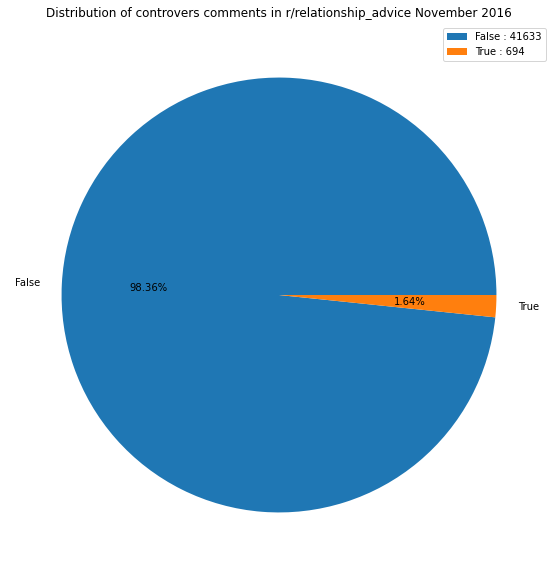

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df["controversiality"].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of controvers comments in r/relationship_advice November 2016")
plt.ylabel('')  # Remove y-axis label for clarity

# How many submissions (link_id)

In [7]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 5259


# Which submission have the most interaction/comments

t3_5ff1pn    263
t3_5cd8gz    261
t3_5f4luf    243
t3_5esjib    212
t3_5c14eq    197
            ... 
t3_5dgm9a      1
t3_5dgqd4      1
t3_59mn4u      1
t3_5dfz2i      1
t3_5ft3h7      1
Name: link_id, Length: 5259, dtype: int64


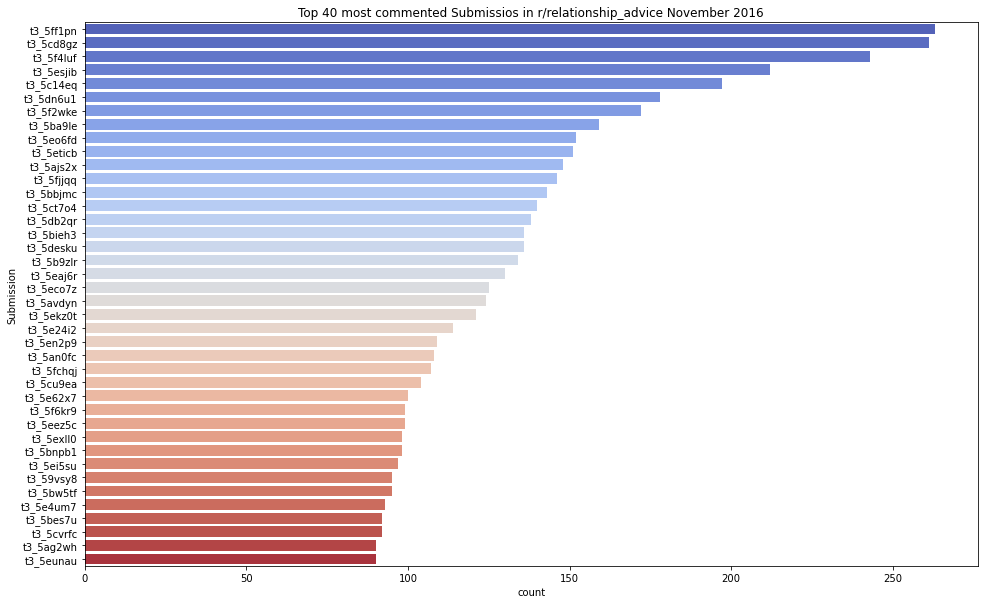

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)

# Ändere die Beschriftung von "link_id" zu "Submission"
plt.ylabel("Submission")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2016")

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())


t3_5ff1pn    263
t3_5cd8gz    261
t3_5f4luf    243
t3_5esjib    212
t3_5c14eq    197
            ... 
t3_5dgm9a      1
t3_5dgqd4      1
t3_59mn4u      1
t3_5dfz2i      1
t3_5ft3h7      1
Name: link_id, Length: 5259, dtype: int64


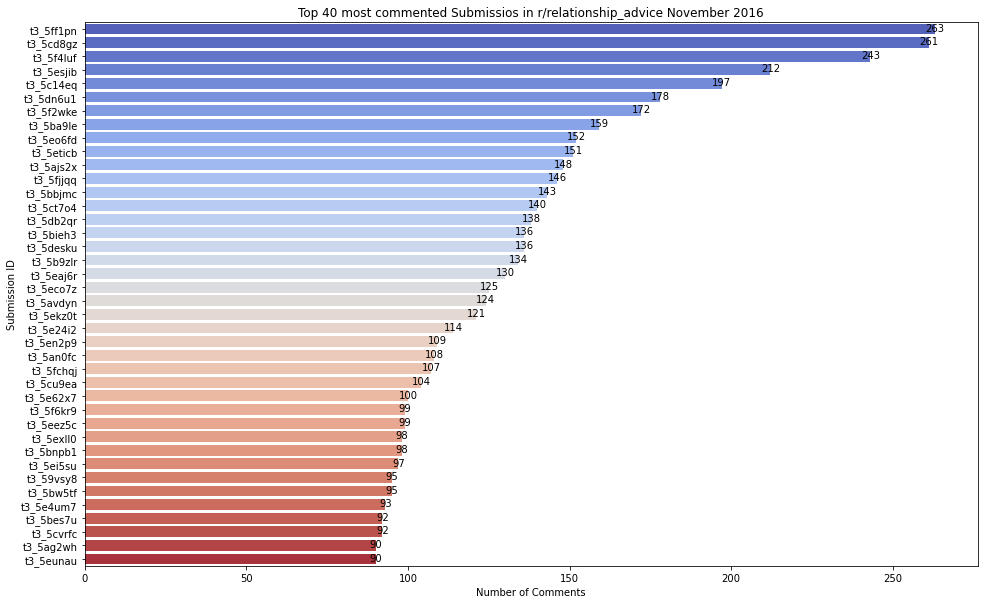

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index, ax=ax)

# Ändere die Beschriftung von "link_id" zu "Submission"
ax.set_ylabel("Submission ID")
ax.set_xlabel("Number of Comments")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2016")

# Anzeige der Anzahl in den Bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 - 0.1, 
            f'{int(p.get_width())}', ha='center', va='center')

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())







# Average number of Comments per Submission per day

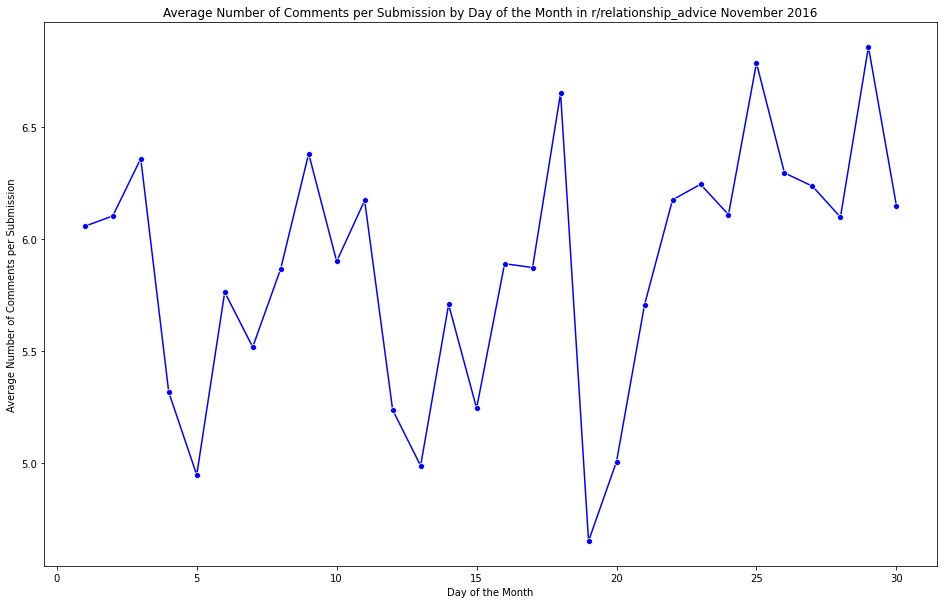

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each day
avg_comments_per_link_id = df.groupby(['created_day', 'link_id']).size().groupby('created_day').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id, x='created_day', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Day of the Month in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Average number of Comments per Submission per h

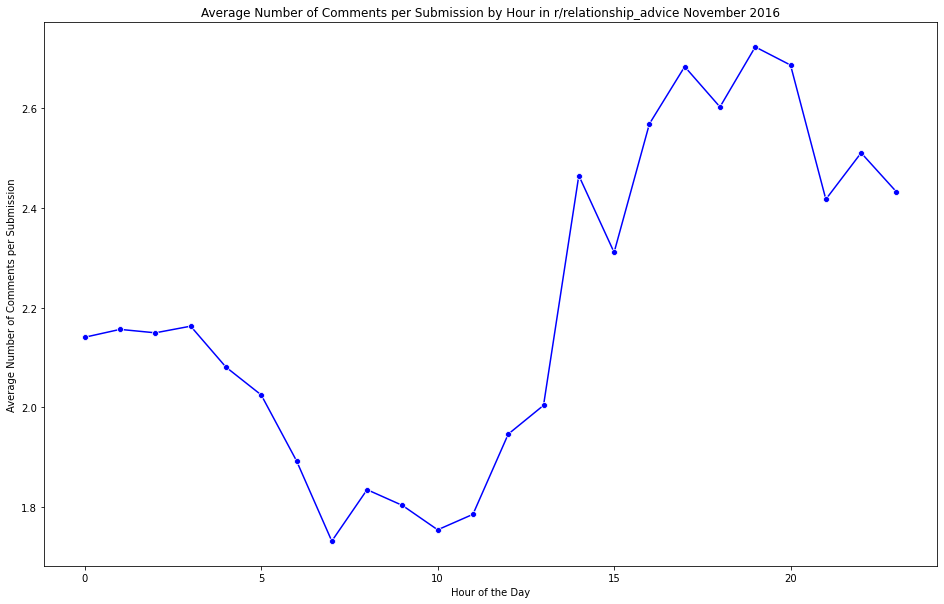

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each hour
avg_comments_per_link_id_hourly = df.groupby(['created_hour', 'link_id']).size().groupby('created_hour').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id_hourly, x='created_hour', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Author

# Who are the Authors/users with the most comments?

# With deleted

Text(0.5, 1.0, 'Top 20 users with the most comments in r/relationship_advice November 2016')

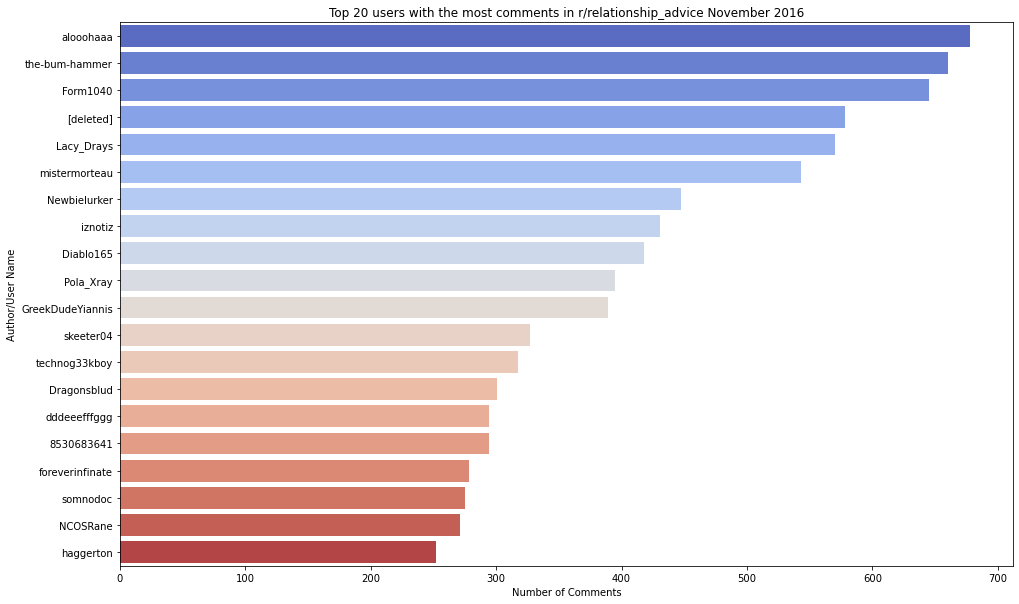

In [12]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)
plt.xlabel("Number of Comments")
plt.ylabel("Author/User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2016")


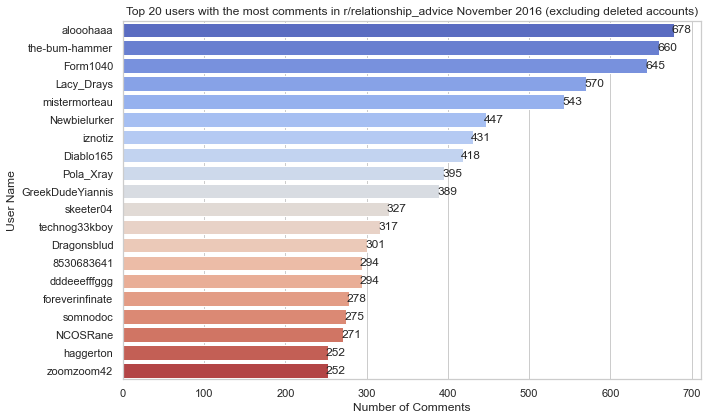

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2016 (excluding deleted accounts)")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [14]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 7377


In [15]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('created_day')["link_id"].value_counts()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()
average_comments_per_submission
# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 8.05


In [16]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.74


# The average number of comments per author per hour

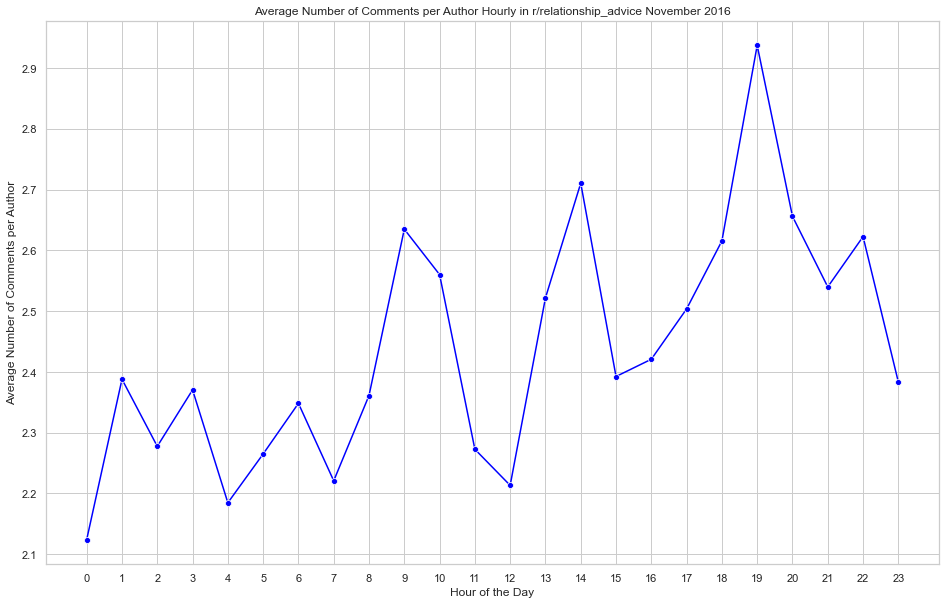

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each hour
avg_comments_per_author_hourly = df.groupby(['created_hour', 'author']).size().groupby('created_hour').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_hourly, x='created_hour', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Hourly in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(24))  # Show all hour values
plt.show()


# The average number of comments per author per day

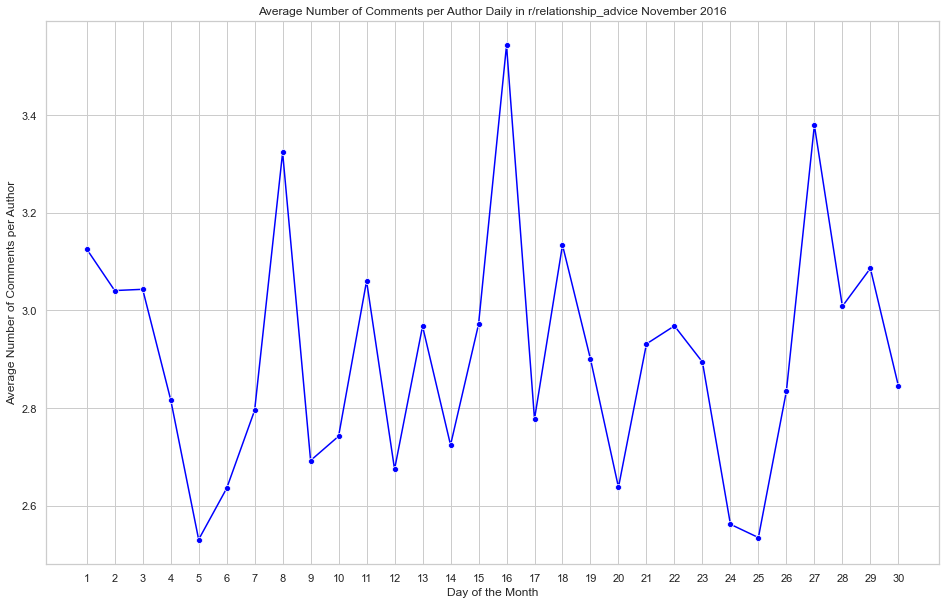

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each day of the week
avg_comments_per_author_daily = df.groupby(['created_day', 'author']).size().groupby('created_day').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_daily, x='created_day', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Daily in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(1, 31))  # Show all day values
plt.show()


# Number of comments per hour

([<matplotlib.axis.XTick at 0x7faab21f8b50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

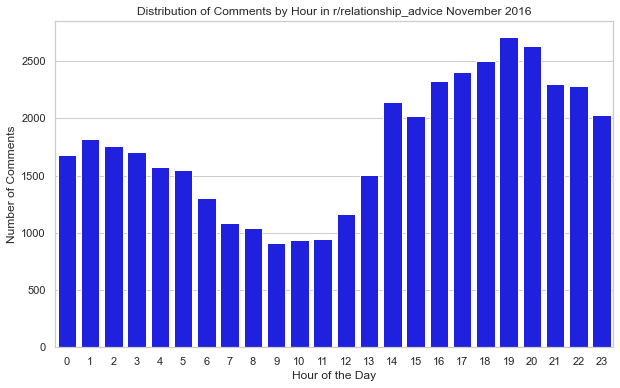

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column
# df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Create the Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Distribution of Comments by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(range(24))  # Set x-axis to hours


# Number of comments per day

Text(0, 0.5, 'Number of Comments')

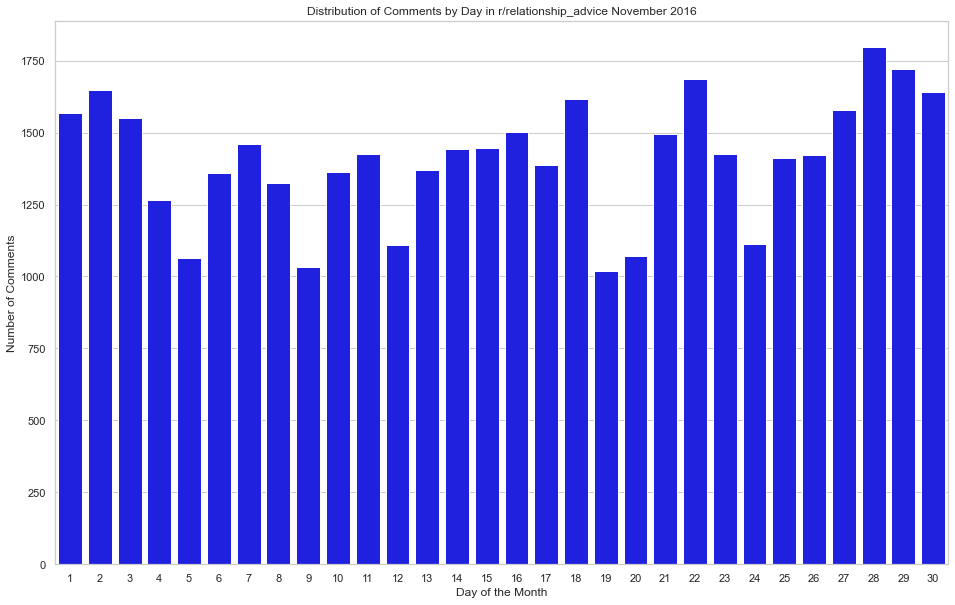

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column

# Create the Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Distribution of Comments by Day in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')


# How many comments are Edited

In [21]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    41141
True      1186
Name: edited, dtype: int64


Text(0, 0.5, '')

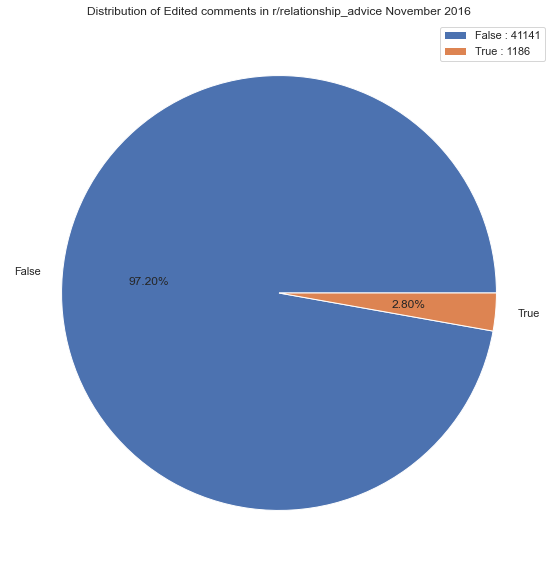

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df['edited'].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of Edited comments in r/relationship_advice November 2016")
plt.ylabel('')  # Remove y-axis label for clarity


# Score Analysis

In [23]:
df["score"].mean()

3.2497932761594255

In [24]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
14029          justkate2  0.284252         0.022968   0.285938   
10156        Kathryn1962  0.036163         0.001011   0.012722   
24088         zachary333  0.928801         0.528915   0.874726   
11634   Clearly_Im_lying  0.139089         0.005684   0.097129   
31502  PreviouslySaydrah  0.151587         0.005264   0.057444   
17815        prettiwylde  0.041173         0.001259   0.015694   
27402          Aquagenie  0.153798         0.003090   0.045921   
12808       mytummyaches  0.853334         0.507037   0.801584   
11638           Tinycowz  0.305399         0.010223   0.109209   
5548       sassy_malassy  0.338998         0.010910   0.082258   

       Identity Attack    Insult    Threat  controversiality  \
14029         0.038426  0.104408  0.077831             False   
10156         0.002701  0.015493  0.007664             False   
24088         0.200884  0.715512  0.283622             False   
11634         0.010877  0.035003  0.011638             False   
31502         0.017063  0.034893  0.027516             False   
17815         0.004199  0.016405  0.007029             False   
27402         0.006401  0.077770  0.008453             False   
12808         0.256480  0.573987  0.135323             False   
11638         0.009693  0.174862  0.013373             False   
5548          0.010803  0.317402  0.066909             False   

                                                    body    link_id  ...  \
14029  "These four years have been mostly good." I'm ...  t3_5cd8gz  ...   
10156  You'll be ready if and when you're ready. If h...  t3_5br011  ...   
24088  What the fuck. Ditch the bitch is the only cor...  t3_5dn6u1  ...   
11634  I know you want to blame the guy, but at the e...  t3_5c14eq  ...   
31502  I rarely use the mod tag, but I wanted to add ...  t3_5eez5c  ...   
17815  this is a sign of things to come.. proposed to...  t3_5cu9ea  ...   
27402  I'm thinking of what I can write to you and it...  t3_5e24i2  ...   
12808  So your girlfriend let your brother feel her u...  t3_5c7ngq  ...   
11638  You shouldnt have given her warning that you s...  t3_5c14eq  ...   
5548   And when he gets upset he yells at me for hour...  t3_5b4khm  ...   

       gilded edited       id created_hour  created_day  created_year  \
14029       0  False  d9vmgc7            8           11          2016   
10156       0  False  d9qm6kj            3            8          2016   
24088       0  False  da5s8mw           16           18          2016   
11634       0  False  d9ssvho           13            9          2016   
31502       0  False  dacyqad           21           23          2016   
17815       0  False  d9zgn2d            5           14          2016   
27402       0   True  da9ar10            8           21          2016   
12808       0  False  d9u96na           13           10          2016   
11638       0  False  d9st8u2           14            9          2016   
5548        0  False  d9lpc8t           16            4          2016   

                                              clean_text  comment_len  \
14029  These four years have been mostly good . I m g...          312   
10156  You ll be ready if and when you re ready . If ...           34   
24088  What the fuck . Ditch the bitch is the only co...           41   
11634  I know you want to blame the guy but at the en...          151   
31502  I rarely use the mod tag but I wanted to add s...         1420   
17815  this is a sign of things to come .. proposed t...           29   
27402  I m thinking of what I can write to you and it...          138   
12808  So your girlfriend let your brother feel her u...           35   
11638  You shouldnt have given her warning that you s...           75   
5548   And when he gets upset he yells at me for hour...           94   

       compound  Sentiment  
14029   -0.7195         -1  
10156    0.7008          1  
24088   -0.9100         -1  
11634   -0.1719         -

In [25]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
11728                lodro  0.252448         0.006866   0.053436   
25471        mistermorteau  0.254629         0.003090   0.034648   
14005          chunk_funky  0.674409         0.169603   0.616331   
29875        Ulfgar_Torunn  0.577953         0.169603   0.640808   
6575       definitelytotes  0.109134         0.002918   0.043666   
14849           hml4easonn  0.770145         0.169603   0.670556   
26439       cookmyfoodonly  0.201260         0.009155   0.157241   
35668  anotherswingingdick  0.360951         0.020128   0.212407   
37219            branfip82  0.644471         0.151800   0.670556   
1647             branfip82  0.076877         0.003586   0.028094   

       Identity Attack    Insult    Threat  controversiality  \
11728         0.008325  0.119787  0.056240             False   
25471         0.005550  0.223032  0.007211             False   
14005         0.048222  0.342037  0.068632             False   
29875         0.079220  0.356777  0.108496             False   
6575          0.007141  0.032359  0.008104              True   
14849         0.033012  0.392980  0.076298             False   
26439         0.011173  0.028061  0.011224             False   
35668         0.379537  0.181075  0.022681             False   
37219         0.027816  0.367985  0.138155             False   
1647          0.008140  0.012719  0.011509             False   

                                                    body    link_id  ...  \
11728  I respectfully disagree. OP's girlfriend didn'...  t3_5c14eq  ...   
25471  So rewarding her is your way to make her speak...  t3_5ds53i  ...   
14005  You are really confused that he didnt like hav...  t3_5cd8gz  ...   
29875  Then don't judge your boyfriend for his action...  t3_5eco7z  ...   
6575   Yeah dude waitresses and waiters in general ar...  t3_5ba9le  ...   
14849  I've built a life with this man lol. Dumping h...  t3_5cg7cy  ...   
26439  I don't mind having an std because I love her,...  t3_5dxy43  ...   
35668  are you new here? Because, over in this corner...  t3_5f2s79  ...   
37219   Nothing you did ever led him to hit you. Your...  t3_5f6l58  ...   
1647   Dating a 16 year old is legal in most places. ...  t3_5an0fc  ...   

       gilded edited       id created_hour  created_day  created_year  \
11728       0  False  d9sx594           15            9          2016   
25471       0  False  da703kv           15           19          2016   
14005       0  False  d9vljrr            7           11          2016   
29875       0  False  dabg0na           20           22          2016   
6575        0  False  d9mxnbc           15            5          2016   
14849       0  False  d9wckb5           21           11          2016   
26439       0  False  da84k69           13           20          2016   
35668       0  False  dah2gfn            2           27          2016   
37219       0  False  daiaweo            0           28          2016   
1647        0  False  d9hqpb3            1            2          2016   

                                              clean_text  comment_len  \
11728  I respectfully disagree . OP s girlfriend didn...           37   
25471  So rewarding her is your way to make her speak...           27   
14005  You are really confused that he didnt like hav...           51   
29875  Then don t judge your boyfriend for his action...           80   
6575   Yeah dude waitresses and waiters in general ar...           65   
14849  I ve built a life with this man lol . Dumping ...           19   
26439  I don t mind having an std because I love her ...           21   
35668  are you new here Because over in this corner o...           48   
37219  Nothing you did ever led him to hit you . Your...           36   
1647   Dating a year old is legal in most places . No...           26   

       compound  Sentiment  
11728   -0.7506         -1  
25471    0.3167          1  
14005   -0.6007         -1  
29875

# On which hour the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

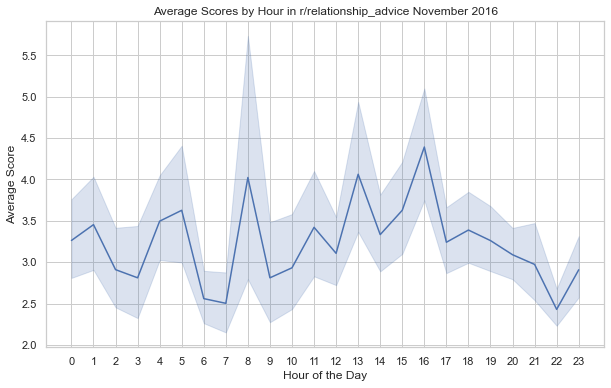

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')




([<matplotlib.axis.XTick at 0x7faaf8dec220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

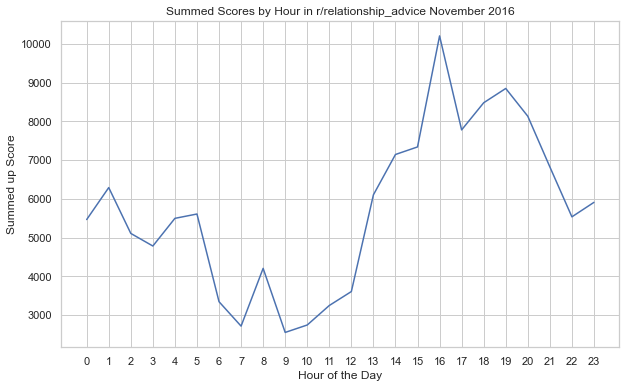

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="score")

plt.title('Summed Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Score')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an



# On which day the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

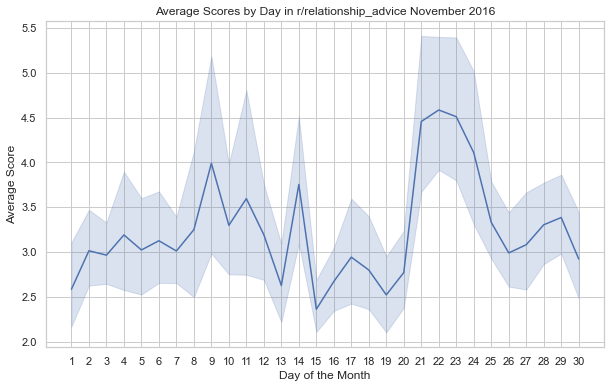

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

([<matplotlib.axis.XTick at 0x7faab23f0df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

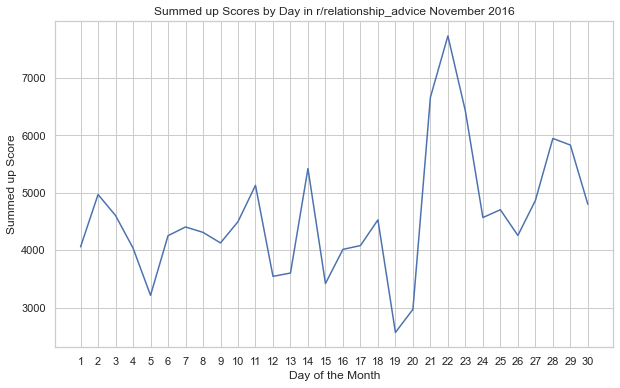

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="score")

plt.title('Summed up Scores by Day in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# Which Author have the most scores

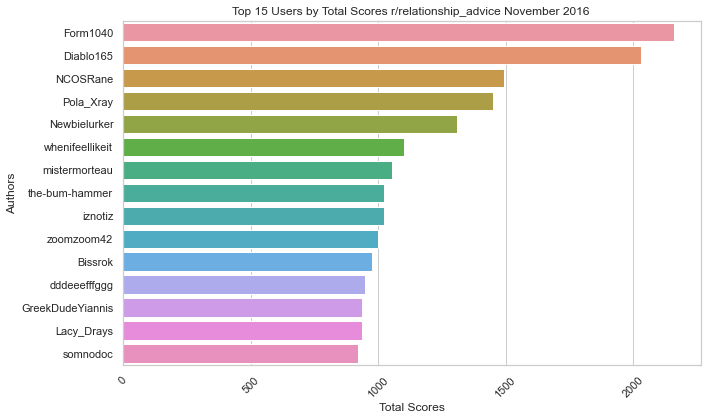

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the corresponding columns
# Make sure to use the same DataFrame name

# Group authors by total scores
author_scores = df.groupby('author')['score'].sum()

# Sort authors by total scores in descending order
sorted_authors = author_scores.sort_values(ascending=False)

# Remove the first author from the sorted list
sorted_authors = sorted_authors.iloc[2:]

# Select the top 15 authors
top_authors = sorted_authors.head(15)

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Users by Total Scores r/relationship_advice November 2016 ')
plt.xlabel("Total Scores")
plt.ylabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()


# Sind Leute die mehr Edited mehr negative?

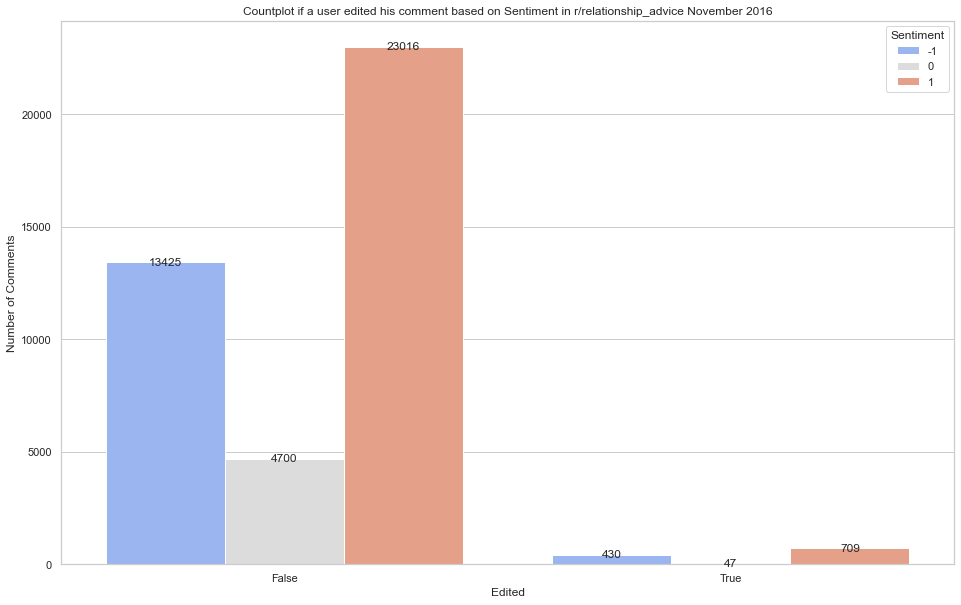

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='edited', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if a user edited his comment based on Sentiment in r/relationship_advice November 2016')
plt.xlabel('Edited')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

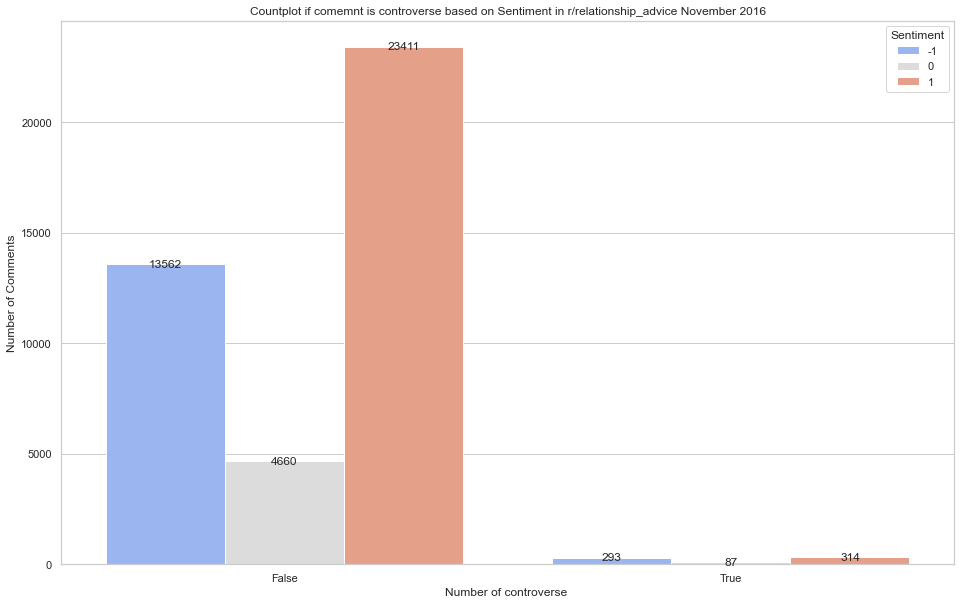

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='controversiality', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if comemnt is controverse based on Sentiment in r/relationship_advice November 2016')
plt.xlabel('Number of controverse ')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

# Sentiment  Analyses

# Durchschnittliche Vader Sentiment score für 2016

In [33]:
df["compound"].mean()

0.1753870295556051

# Vader Sentiment coutplot

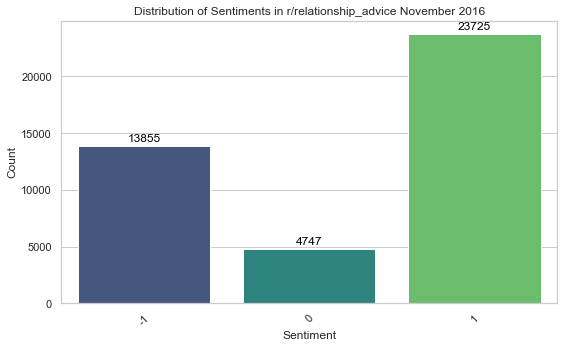

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in r/relationship_advice November 2016')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()


# Prozentuale Verteilung von Vader Sentiment

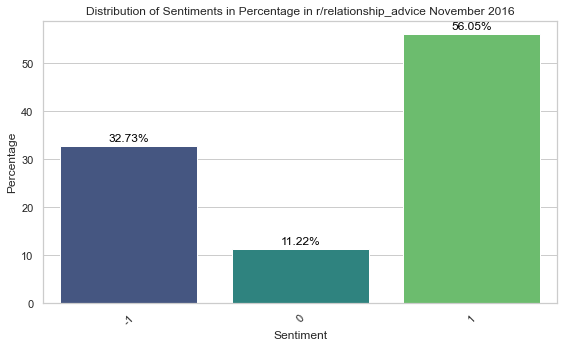

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage in r/relationship_advice November 2016')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Verteilung des Compound scores

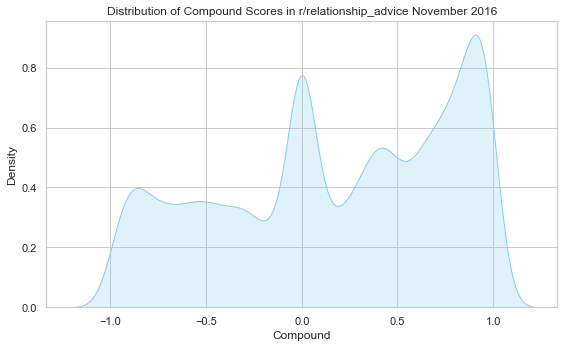

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores in r/relationship_advice November 2016')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()

# An welchen Tag sind die Kommentare durchschnittlich am negativsten bzw positivesten

([<matplotlib.axis.XTick at 0x7faae8a3c100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

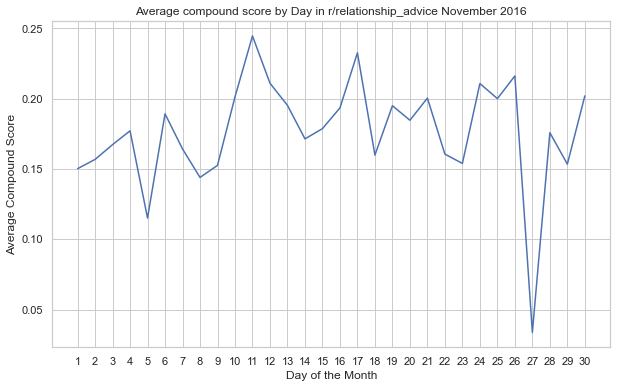

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="compound")

plt.title('Average compound score by Day in r/relationship_advice November 2016')
plt.xlabel('Day of the Month')
plt.ylabel('Average Compound Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# An welcher stunde sind die Kommentare im durchschnitt am negativsten oder positivsten

([<matplotlib.axis.XTick at 0x7faae9361ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

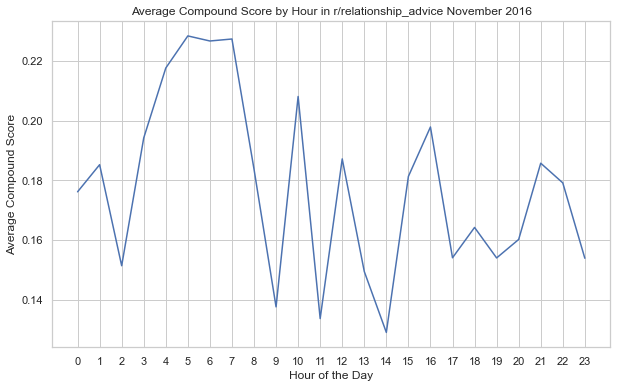

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="compound")

plt.title('Average Compound Score by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel("Average Compound Score")
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

# Zu welcher Zeit haben negative, positive und neutrale kommentare im Durchschnitt den höchsten scoren

Text(0, 0.5, 'Average Score')

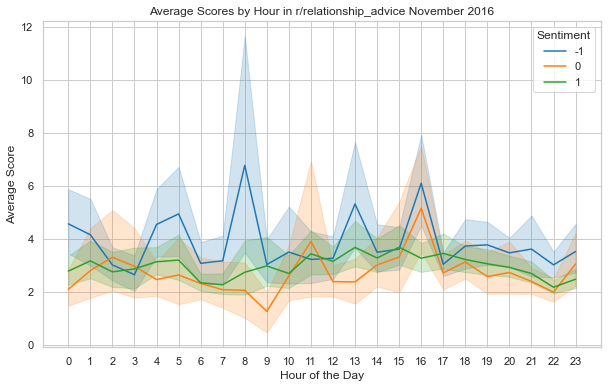

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

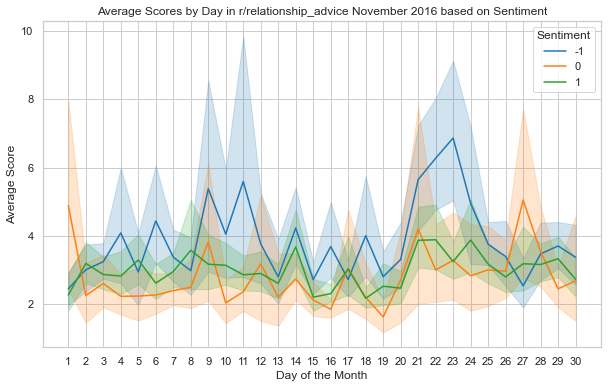

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')


Text(0, 0.5, 'Average Score')

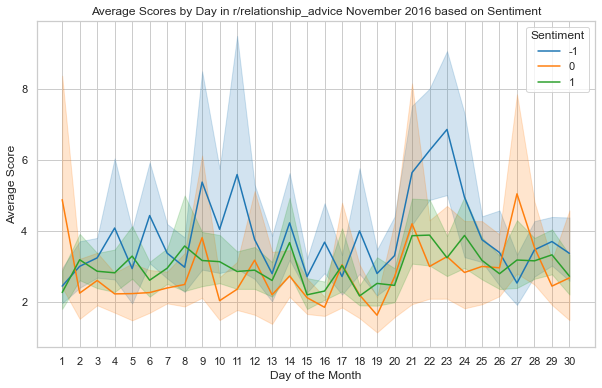

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Summed up Score')

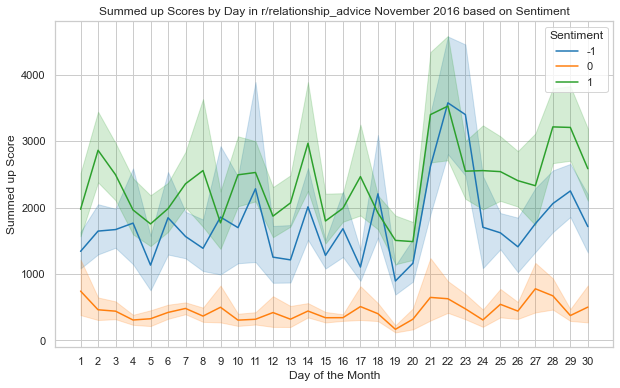

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="score", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up Scores by Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')

<AxesSubplot:xlabel='Sentiment', ylabel='score'>

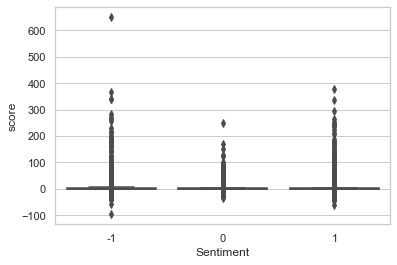

In [43]:
sns.boxplot(data=df, y="score", x="Sentiment")

<AxesSubplot:xlabel='Sentiment', ylabel='comment_len'>

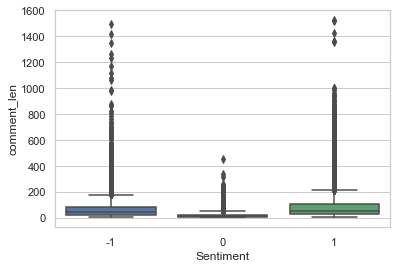

In [44]:
sns.boxplot(data=df, y="comment_len", x="Sentiment")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             42327 non-null  object 
 1   Toxicity           41734 non-null  float64
 2   Severe Toxicity    41734 non-null  float64
 3   Profanity          41734 non-null  float64
 4   Identity Attack    41734 non-null  float64
 5   Insult             41734 non-null  float64
 6   Threat             41734 non-null  float64
 7   controversiality   42327 non-null  bool   
 8   body               42327 non-null  object 
 9   link_id            42327 non-null  object 
 10  score              42327 non-null  int64  
 11  author_flair_text  42327 non-null  object 
 12  created_utc        42327 non-null  object 
 13  parent_id          42327 non-null  object 
 14  gilded             42327 non-null  int64  
 15  edited             42327 non-null  bool   
 16  id                 423

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             42327 non-null  object 
 1   Toxicity           41734 non-null  float64
 2   Severe Toxicity    41734 non-null  float64
 3   Profanity          41734 non-null  float64
 4   Identity Attack    41734 non-null  float64
 5   Insult             41734 non-null  float64
 6   Threat             41734 non-null  float64
 7   controversiality   42327 non-null  bool   
 8   body               42327 non-null  object 
 9   link_id            42327 non-null  object 
 10  score              42327 non-null  int64  
 11  author_flair_text  42327 non-null  object 
 12  created_utc        42327 non-null  object 
 13  parent_id          42327 non-null  object 
 14  gilded             42327 non-null  int64  
 15  edited             42327 non-null  bool   
 16  id                 423

# Comment lengt

In [47]:
df["comment_len"].mean()

69.41824367425048

In [48]:
df["comment_len"].median()

43.0

([<matplotlib.axis.XTick at 0x7faab24aff40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

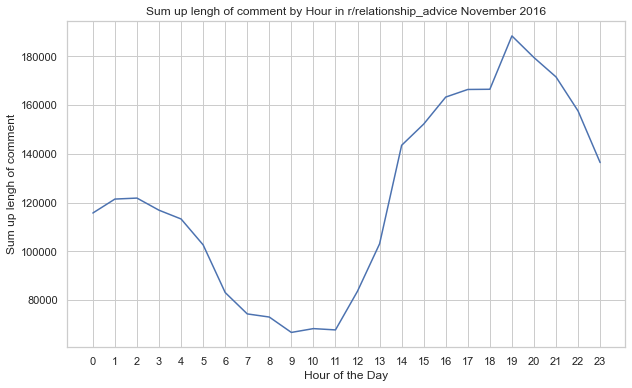

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Sum up lengh of comment by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum up lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7faaa987e370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

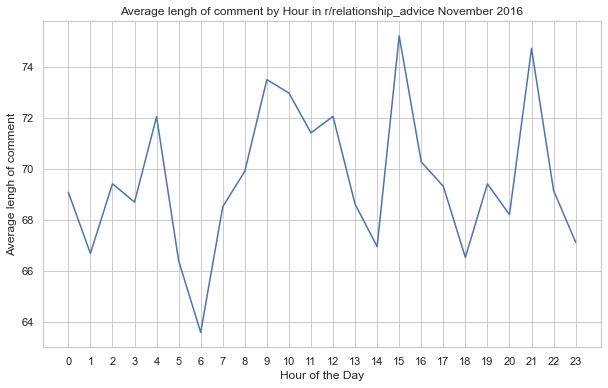

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Average lengh of comment by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

Text(0, 0.5, 'Average Comment Length')

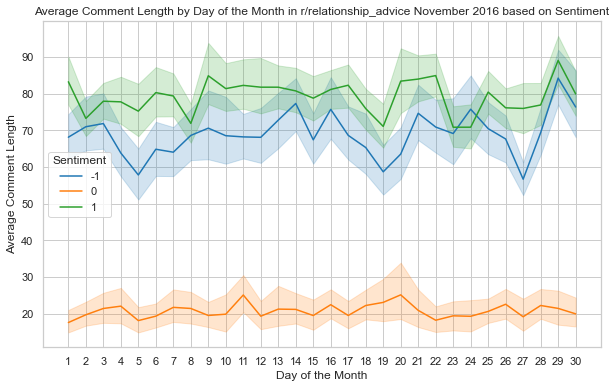

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all day values

plt.title('Average Comment Length by Day of the Month in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Comment Length')



Text(0, 0.5, 'Average Comment Length')

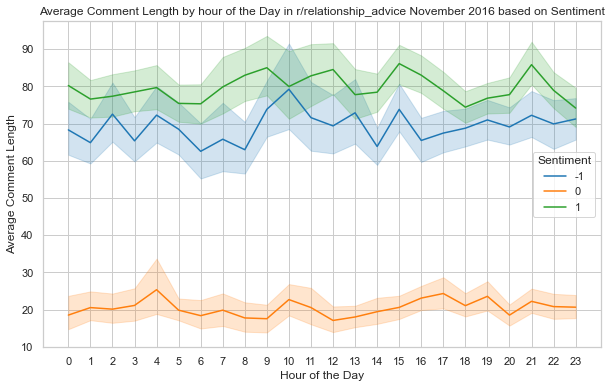

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all day values

plt.title('Average Comment Length by hour of the Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comment Length')

Text(0, 0.5, 'Summed up Comment length')

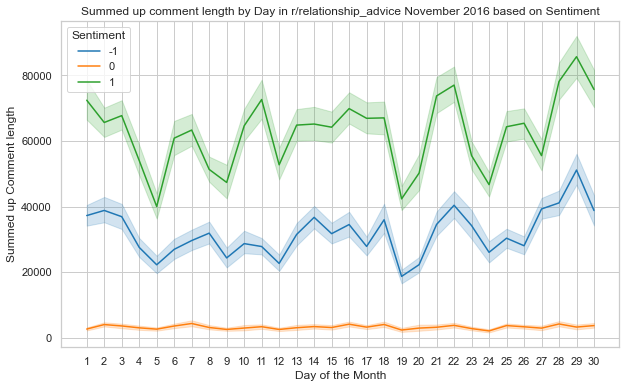

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up comment length by Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

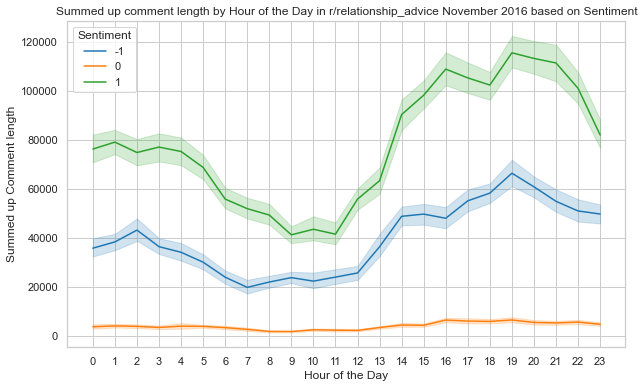

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment length by Hour of the Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

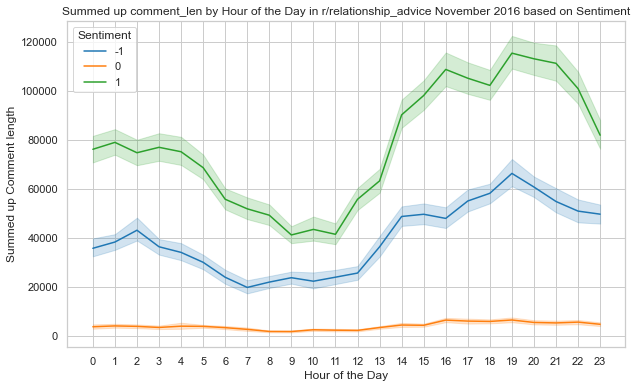

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment_len by Hour of the Day in r/relationship_advice November 2016 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

# Toxicity 

In [56]:
import pandas as pd

# Annahme: DataFrame df enthält die Spalten "comment_len", "compound" und "Toxicity"

# Filtere die Zeilen, in denen "Toxicity" keinen Wert hat
filtered_df = df[df['Toxicity'].isnull()]

# Berechne den Durchschnitt von "comment_len" und "compound" für die gefilterten Zeilen
mean_comment_len = filtered_df['comment_len'].mean()
mean_compound_score = filtered_df['compound'].mean()

print(f'Mean Comment Length (where Toxicity is null): {mean_comment_len}')
print(f'Mean Compound Score (where Toxicity is null): {mean_compound_score}')


Mean Comment Length (where Toxicity is null): 3.8296795952782463
Mean Compound Score (where Toxicity is null): 0.11727133220910614


Text(0, 0.5, 'Count')

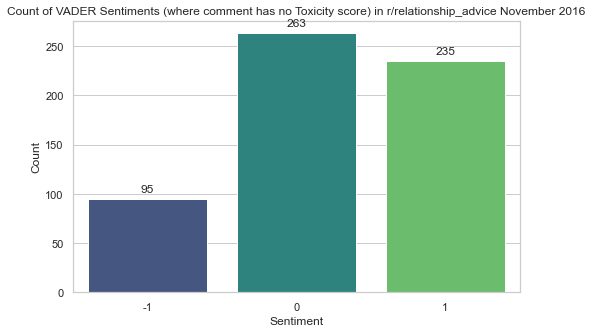

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "sentiment"

# Erstelle das Countplot für die Spalte "sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den genauen Zahlen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of VADER Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2016')
plt.xlabel('Sentiment')
plt.ylabel('Count')





Text(0, 0.5, 'Percentage')

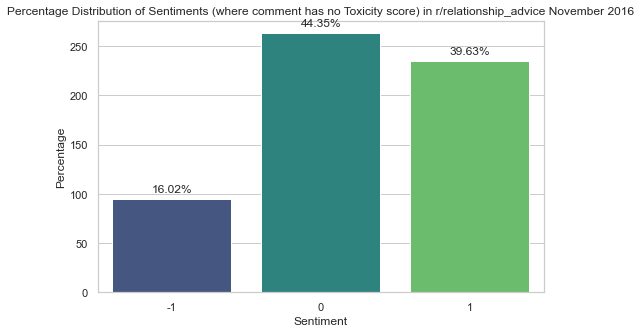

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "Sentiment"

# Berechne die prozentualen Anteile für jeden Sentiment-Wert
total_count = len(filtered_df)
percentages = (filtered_df['Sentiment'].value_counts() / total_count) * 100

# Erstelle das Countplot für die Spalte "Sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den prozentualen Anteilen
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage Distribution of Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2016')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')




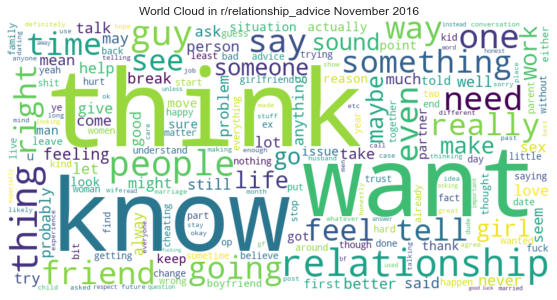

Text(0, 0.5, 'Count')

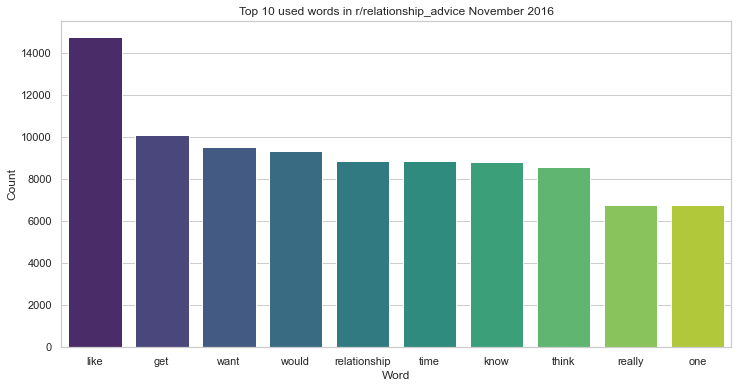

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Assuming you already have a DataFrame named "df" with a column named "body"
# Make sure that nltk, wordcloud, seaborn, and matplotlib are installed
# Install them with: pip install nltk wordcloud seaborn matplotlib

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Combine all texts in the "body" column into a single text and remove stopwords
df["body_clean"] = df["clean_text"].apply(lambda x: " ".join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Combine all cleaned texts into a single text
text = " ".join(df["body_clean"])

# Create the Word Cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("World Cloud in r/relationship_advice November 2016")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a Countplot for the Top 10 words
top_words = Counter(text.split()).most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 used words in r/relationship_advice November 2016")
plt.xlabel("Word")
plt.ylabel("Count")



# Toxicity Analyses

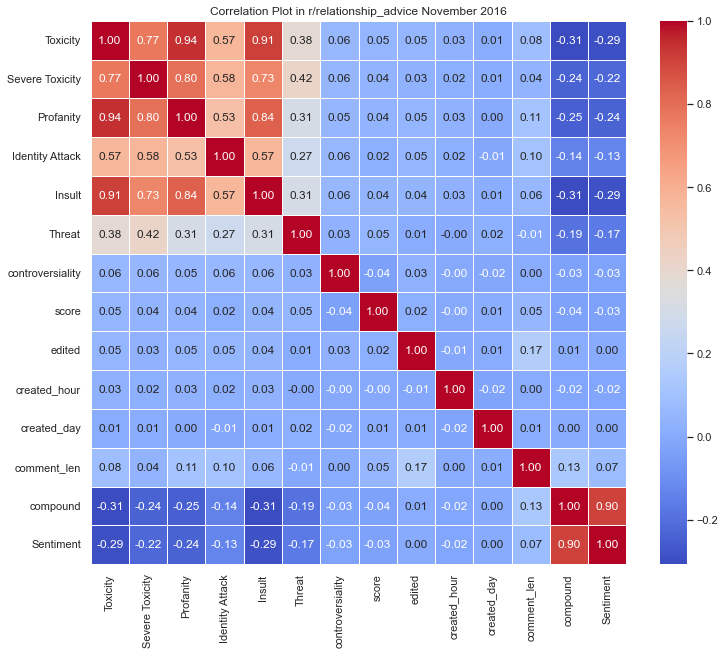

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Entferne die Spalten created_year, created_hour, und created_day
columns_to_exclude = ['created_year',"gilded"]
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Berechne die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Erstelle den Korrelationsplot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Plot in r/relationship_advice November 2016')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             42327 non-null  object 
 1   Toxicity           41734 non-null  float64
 2   Severe Toxicity    41734 non-null  float64
 3   Profanity          41734 non-null  float64
 4   Identity Attack    41734 non-null  float64
 5   Insult             41734 non-null  float64
 6   Threat             41734 non-null  float64
 7   controversiality   42327 non-null  bool   
 8   body               42327 non-null  object 
 9   link_id            42327 non-null  object 
 10  score              42327 non-null  int64  
 11  author_flair_text  42327 non-null  object 
 12  created_utc        42327 non-null  object 
 13  parent_id          42327 non-null  object 
 14  gilded             42327 non-null  int64  
 15  edited             42327 non-null  bool   
 16  id                 423

In [62]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
df['Toxicity_0.7_or_higher'] = (df['Toxicity'] >= 0.7).astype(int)
df['Severe_Toxicity_0.7_or_higher'] = (df['Severe Toxicity'] >= 0.7).astype(int)
df['Profanity_0.7_or_higher'] = (df['Profanity'] >= 0.7).astype(int)
df['Identity_Attack_0.7_or_higher'] = (df['Identity Attack'] >= 0.7).astype(int)
df['Insult_0.7_or_higher'] = (df['Insult'] >= 0.7).astype(int)
df['Threat_0.7_or_higher'] = (df['Threat'] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
count_toxicity = df['Toxicity_0.7_or_higher'].sum()
count_severe_toxicity = df['Severe_Toxicity_0.7_or_higher'].sum()
count_profanity = df['Profanity_0.7_or_higher'].sum()
count_identity_attack = df['Identity_Attack_0.7_or_higher'].sum()
count_insult = df['Insult_0.7_or_higher'].sum()
count_threat = df['Threat_0.7_or_higher'].sum()

# Drucke die Ergebnisse
print(f'Count of Toxicity >= 0.7: {count_toxicity}')
print(f'Count of Severe Toxicity >= 0.7: {count_severe_toxicity}')
print(f'Count of Profanity >= 0.7: {count_profanity}')
print(f'Count of Identity Attack >= 0.7: {count_identity_attack}')
print(f'Count of Insult >= 0.7: {count_insult}')
print(f'Count of Threat >= 0.7: {count_threat}')


Count of Toxicity >= 0.7: 2657
Count of Severe Toxicity >= 0.7: 4
Count of Profanity >= 0.7: 2481
Count of Identity Attack >= 0.7: 1
Count of Insult >= 0.7: 458
Count of Threat >= 0.7: 8


In [63]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
for col in selected_columns:
    df[f'{col}_0.7_or_higher'] = (df[col] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
counts = df[[f'{col}_0.7_or_higher' for col in selected_columns]].sum()

# Berechne den Prozentsatz im Verhältnis zur Gesamtanzahl der Zeilen
total_rows = len(df)
percentages = counts / total_rows * 100

# Drucke die prozentualen Ergebnisse
for col,count, percentage in zip(selected_columns,counts,percentages):
    print(f'Percentage of {col} >= 0.7: {count} {percentage:.3f}%')



Percentage of Toxicity >= 0.7: 2657 6.277%
Percentage of Severe Toxicity >= 0.7: 4 0.009%
Percentage of Profanity >= 0.7: 2481 5.862%
Percentage of Identity Attack >= 0.7: 1 0.002%
Percentage of Insult >= 0.7: 458 1.082%
Percentage of Threat >= 0.7: 8 0.019%


Text(0, 0.5, 'Average Toxicity Score')

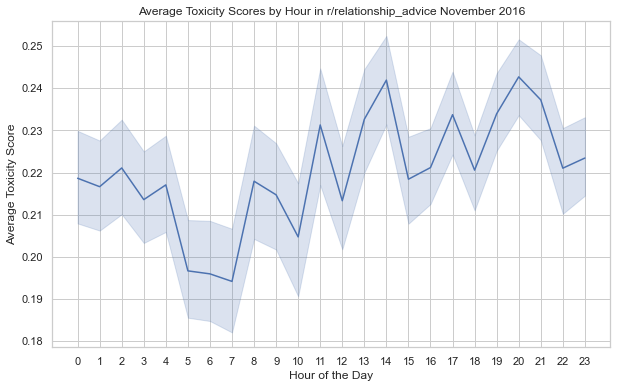

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Toxicity Score')

Text(0, 0.5, 'Average Toxicity Score')

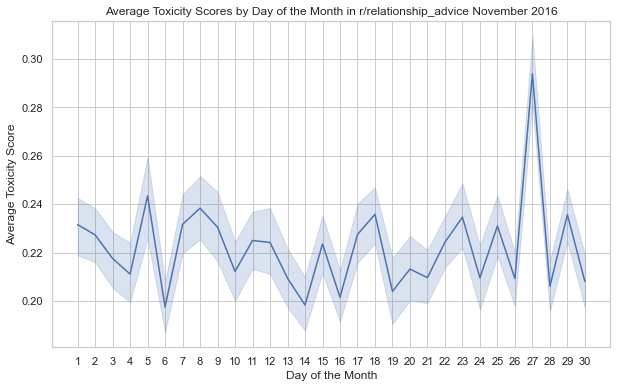

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Toxicity Score')

# Severe Toxicity

Text(0, 0.5, 'Average Severe Toxicity Score')

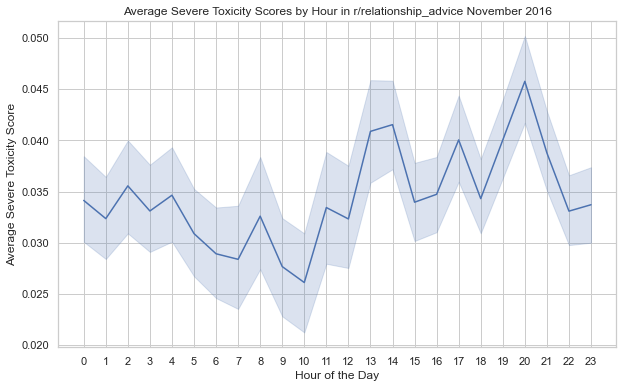

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severe Toxicity Score')

Text(0, 0.5, 'Average Severe Toxicity Score')

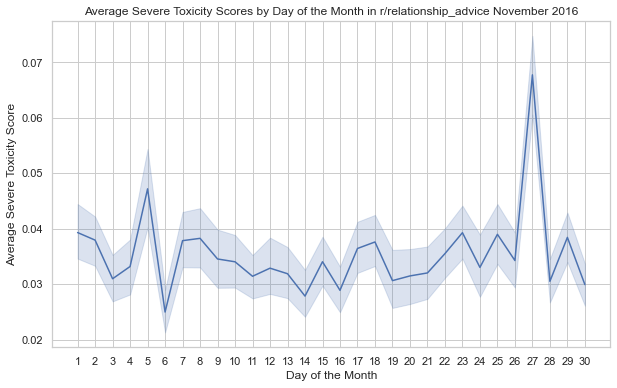

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Severe Toxicity Score')

# Profanity

Text(0, 0.5, 'Average Profanity Score')

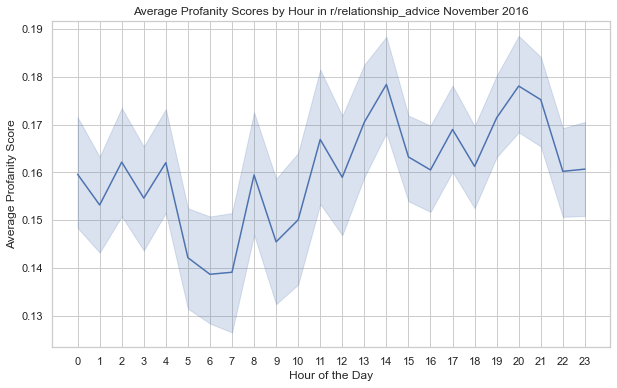

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Profanity Score')

Text(0, 0.5, 'Average Profanity Score')

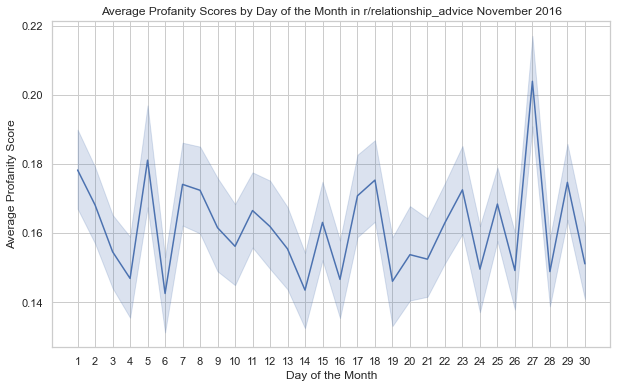

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Profanity Score')

# Identity Attack

Text(0, 0.5, 'Average Identity Attack Score')

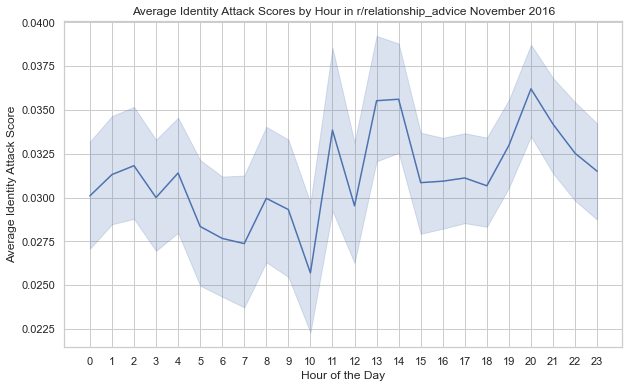

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Identity Attack Score')

Text(0, 0.5, 'Average Identity Attack Score')

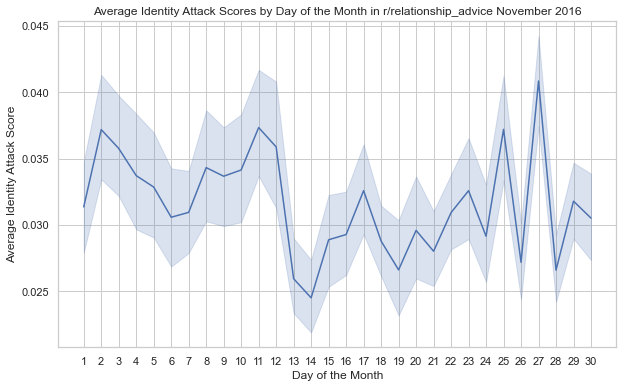

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Identity Attack Score')

# Insult

Text(0, 0.5, 'Average Insult Score')

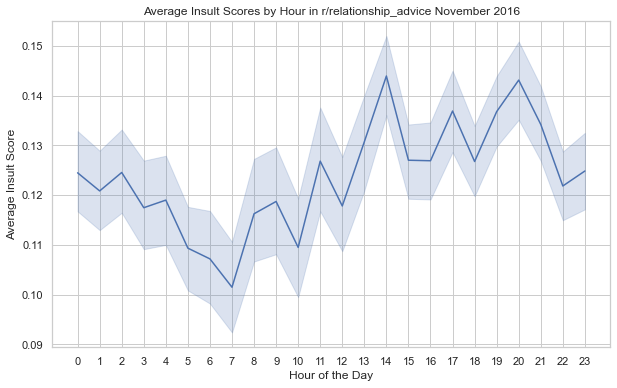

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Insult Score')

Text(0, 0.5, 'Average Insult Score')

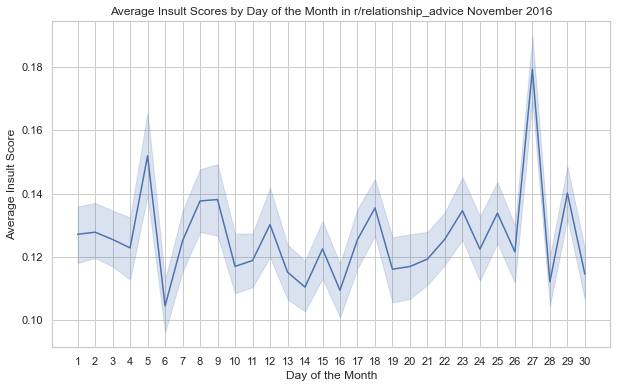

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Insult Score')

# Threat

Text(0, 0.5, 'Average Threat Score')

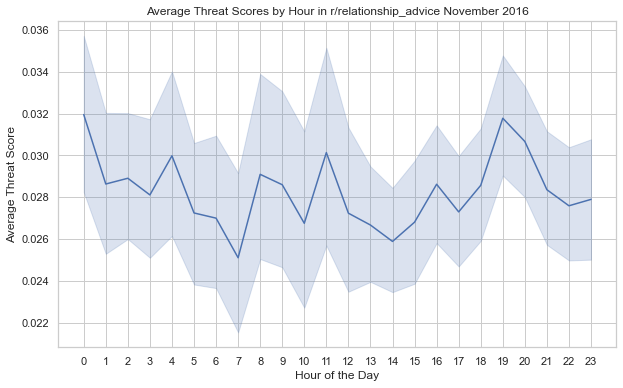

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Hour in r/relationship_advice November 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Threat Score')

Text(0, 0.5, 'Average Threat Score')

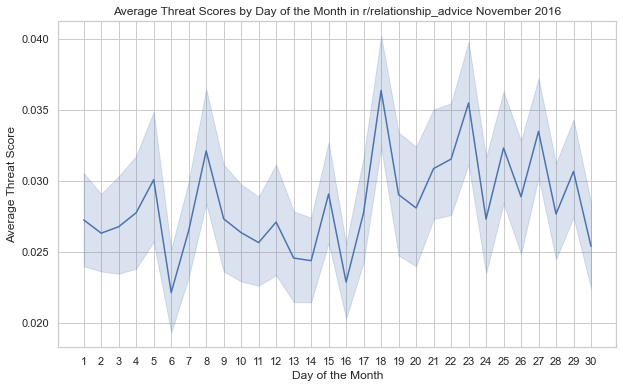

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Threat Score')

# Summary

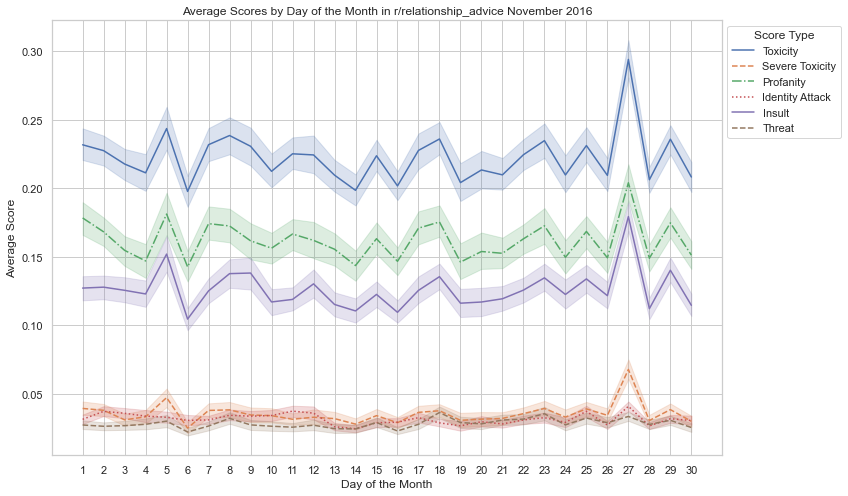

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_day", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_day", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_day", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_day", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_day", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_day", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day of the Month in r/relationship_advice November 2016')
plt.xlabel("Day of the Month")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


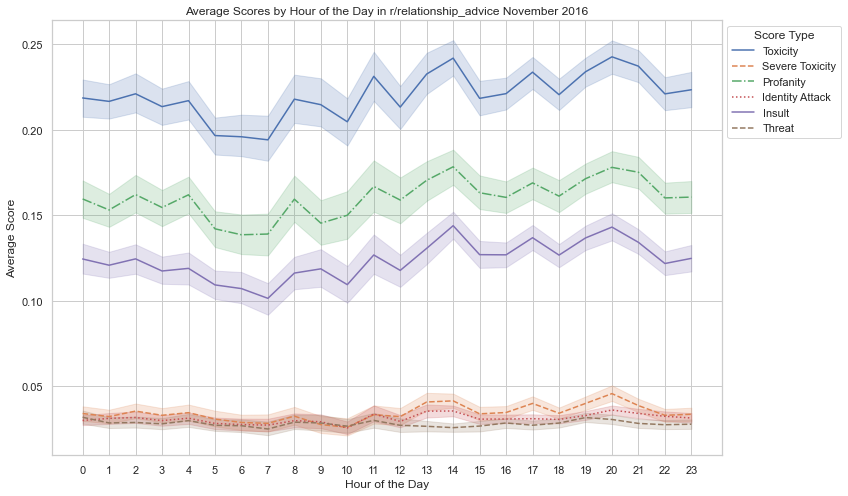

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_hour", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_hour", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_hour", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_hour", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_hour", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour of the Day in r/relationship_advice November 2016')
plt.xlabel("Hour of the Day")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))

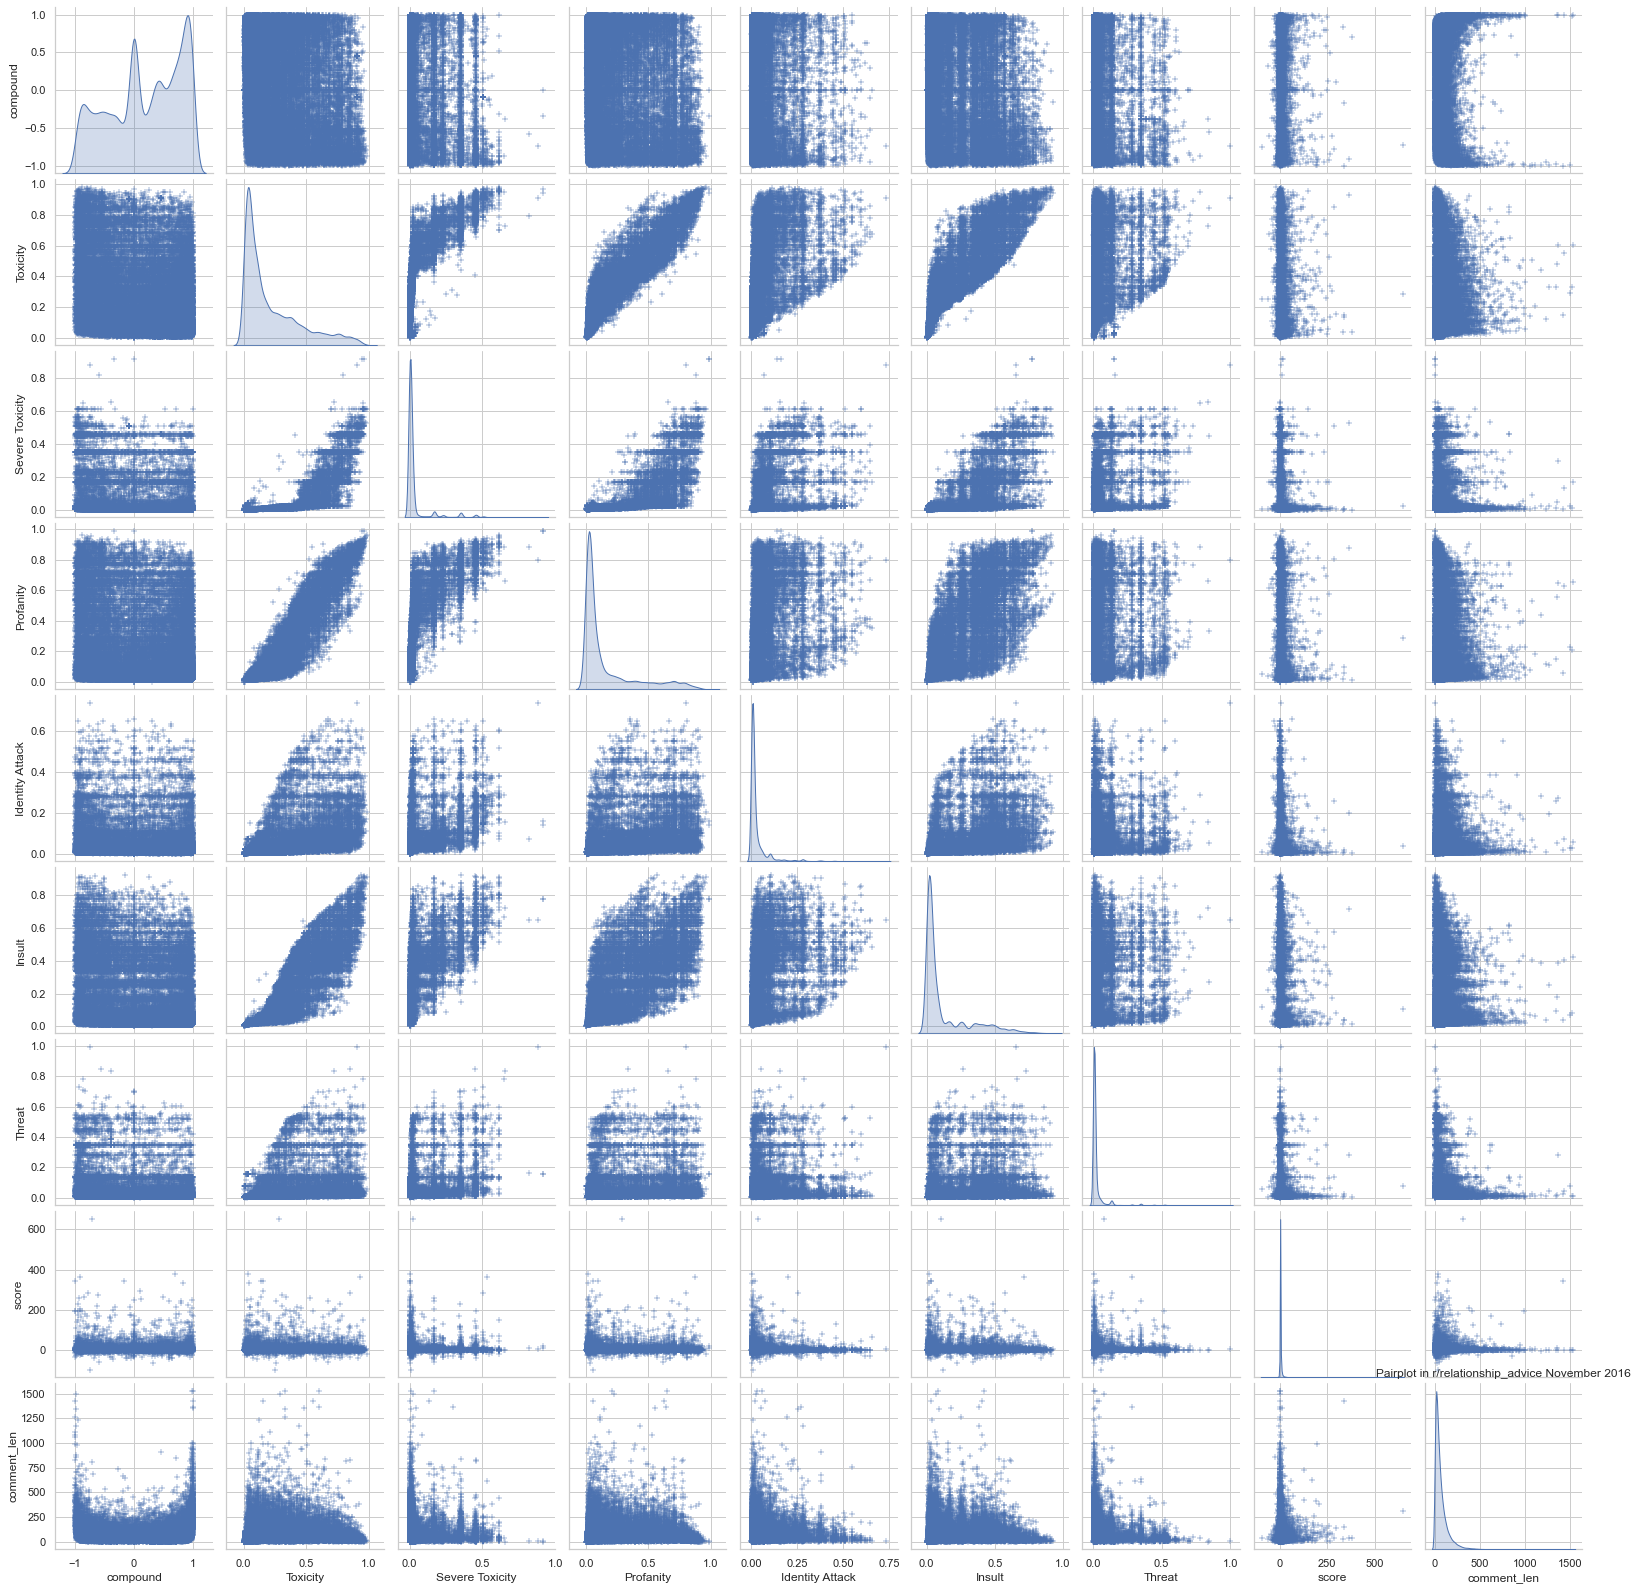

In [78]:
# Erstelle eine Pairplot-Matrix für ausgewählte Spalten
selected_columns = ['compound', 'Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat',"score","comment_len"]
sns.pairplot(df[selected_columns], diag_kind='kde', markers='+')
plt.title("Pairplot in r/relationship_advice November 2016")
plt.show()




# Submission based

# Nr of toxcix users

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   author                         42327 non-null  object 
 1   Toxicity                       41734 non-null  float64
 2   Severe Toxicity                41734 non-null  float64
 3   Profanity                      41734 non-null  float64
 4   Identity Attack                41734 non-null  float64
 5   Insult                         41734 non-null  float64
 6   Threat                         41734 non-null  float64
 7   controversiality               42327 non-null  bool   
 8   body                           42327 non-null  object 
 9   link_id                        42327 non-null  object 
 10  score                          42327 non-null  int64  
 11  author_flair_text              42327 non-null  object 
 12  created_utc                    42327 non-null 

In [80]:
import pandas as pd

# Kategorien für die Berechnung
categories = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# DataFrame für die Ergebnisse erstellen
results_df = pd.DataFrame(columns=['Category', 'NumToxicUsers'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Ergebnisse zum DataFrame hinzufügen
    results_df = results_df.append({'Category': category, 'NumToxicUsers': num_toxic_users_category}, ignore_index=True)

# Ausgabe der Ergebnisse
print(results_df)



#32773

          Category NumToxicUsers
0         Toxicity           203
1  Severe Toxicity             0
2        Profanity           200
3  Identity Attack             0
4           Insult            32
5           Threat             0


In [81]:
# DataFrame für prozentuale Ergebnisse erstellen
percentage_results_df = pd.DataFrame(columns=['Category', 'PercentToxicUsers'])

# Gesamtanzahl der Benutzer
total_users = df['author'].nunique()
#total_users = len(df['author'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Berechne den prozentualen Anteil toxischer Benutzer für die Kategorie
    percent_toxic_users_category = (num_toxic_users_category / total_users) * 100

    # Ergebnisse zum DataFrame hinzufügen
    percentage_results_df = percentage_results_df.append({'Category': category, 'PercentToxicUsers': percent_toxic_users_category}, ignore_index=True)

# Ausgabe der prozentualen Ergebnisse
print(percentage_results_df)



          Category  PercentToxicUsers
0         Toxicity           2.751423
1  Severe Toxicity           0.000000
2        Profanity           2.710762
3  Identity Attack           0.000000
4           Insult           0.433722
5           Threat           0.000000
